In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt


GRID_SIZE = 30          
START = (0, 0)              
GOAL = (29, 29)             
OBSTACLE_RATIO = 0.2
LEARNING_RATE = 0.5         
DISCOUNT_FACTOR = 0.9
EPSILON_START = 1.0         
EPSILON_DECAY = 0.995      
EPSILON_MIN = 0.1         
EPISODES = 10000     

In [34]:
class GridWorld:
    def __init__(self, size, start, goal, obstacle_ratio):
        self.size = size
        self.start = start
        self.goal = goal
        self.grid = np.zeros((size, size))
        self._place_obstacles(obstacle_ratio)

    def _place_obstacles(self, ratio):
        obstacle_count = int(ratio * self.size * self.size)
        for _ in range(obstacle_count):
            x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            while (x, y) == self.start or (x, y) == self.goal or self.grid[x, y] == 1:
                x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            self.grid[x, y] = 1

    def is_obstacle(self, position):
        return self.grid[position] == 1

    def is_goal(self, position):
        return position == self.goal

In [35]:
# Q-learning agent with epsilon decay
class QLearningAgent:
    def __init__(self, environment, learning_rate, discount_factor, epsilon_start, epsilon_decay, epsilon_min):
        self.env = environment
        self.q_table = np.zeros((self.env.size, self.env.size, 4))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, 3)  # Explore: random action
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # Exploit: best action

    def update_q_value(self, state, action, reward, next_state):
        old_q = self.q_table[state[0], state[1], action]
        max_future_q = np.max(self.q_table[next_state[0], next_state[1]])
        new_q = (1 - self.learning_rate) * old_q + self.learning_rate * (reward + self.discount_factor * max_future_q)
        self.q_table[state[0], state[1], action] = new_q

    def get_next_position(self, state, action):
        return (max(0, min(self.env.size - 1, state[0] + self.actions[action][0])),
                max(0, min(self.env.size - 1, state[1] + self.actions[action][1])))

    def train(self, episodes):
        for episode in range(episodes):
            state = self.env.start
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)  # Decay epsilon
            while not self.env.is_goal(state):
                action = self.choose_action(state)
                next_state = self.get_next_position(state, action)

                if self.env.is_obstacle(next_state):
                    reward = -1
                    next_state = state
                elif self.env.is_goal(next_state):
                    reward = 100
                else:
                    reward = -0.1

                self.update_q_value(state, action, reward, next_state)
                state = next_state  # Move to the next state

In [36]:
environment = GridWorld(GRID_SIZE, START, GOAL, OBSTACLE_RATIO)
agent = QLearningAgent(environment, LEARNING_RATE, DISCOUNT_FACTOR, EPSILON_START, EPSILON_DECAY, EPSILON_MIN)

agent.train(EPISODES)

In [37]:
path = test_agent(agent, environment)

Goal reached successfully!


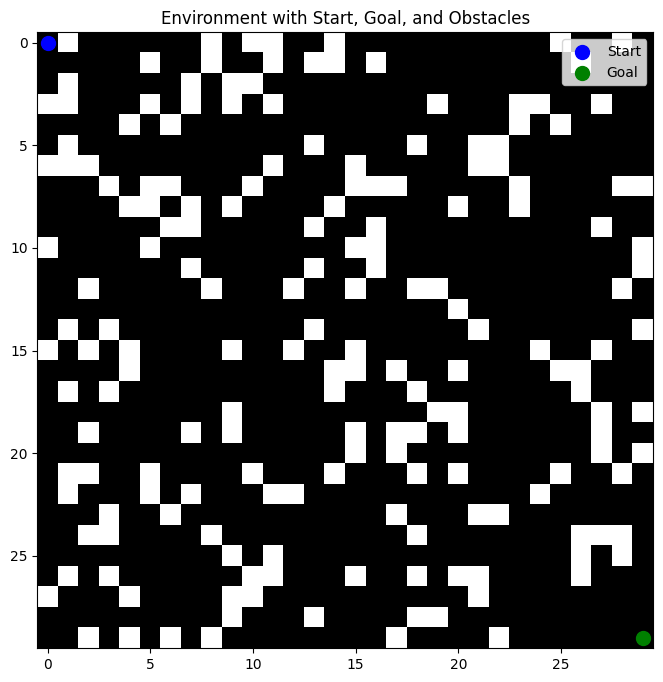

In [38]:
def visualize_environment(environment):
    plt.figure(figsize=(8, 8))
    grid = environment.grid.copy()
    plt.imshow(grid, cmap="gray", origin="upper")

    plt.scatter(environment.start[1], environment.start[0], color="blue", s=100, label="Start")
    plt.scatter(environment.goal[1], environment.goal[0], color="green", s=100, label="Goal")
    plt.legend()
    plt.title("Environment with Start, Goal, and Obstacles")
    plt.show()

visualize_environment(environment)

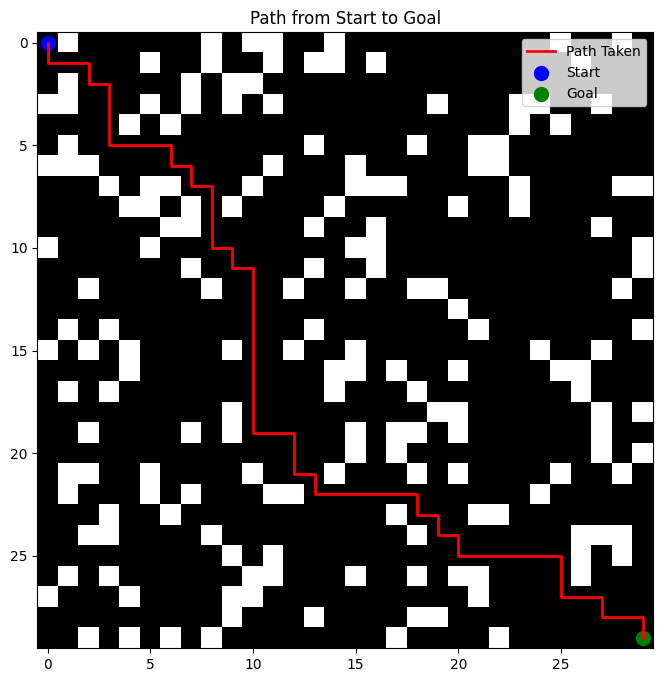

In [39]:
def visualize_path(environment, path):
    plt.figure(figsize=(8, 8))
    grid = environment.grid.copy()
    plt.imshow(grid, cmap="gray", origin="upper")

    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color="red", linewidth=2, label="Path Taken")
    plt.scatter(environment.start[1], environment.start[0], color="blue", s=100, label="Start")
    plt.scatter(environment.goal[1], environment.goal[0], color="green", s=100, label="Goal")
    plt.legend()
    plt.title("Path from Start to Goal")
    plt.show()

visualize_path(environment, path)